In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [21]:
 #loading the data 
df = pd.read_csv(r"EOD-MSFT.csv")

In [22]:
print(df.head())

         Date   Open     High     Low  Close      Volume  Dividend  Split  \
0  2017-12-28  85.90  85.9300  85.550  85.72  10594344.0       0.0    1.0   
1  2017-12-27  85.65  85.9800  85.215  85.71  14678025.0       0.0    1.0   
2  2017-12-26  85.31  85.5346  85.030  85.40   9891237.0       0.0    1.0   
3  2017-12-22  85.40  85.6300  84.920  85.51  14145841.0       0.0    1.0   
4  2017-12-21  86.05  86.1000  85.400  85.50  17990745.0       0.0    1.0   

    Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  
0  82.828094  82.857021  82.490610  82.654531  10594344.0  
1  82.587034  82.905233  82.167590  82.644889  14678025.0  
2  82.259193  82.475761  81.989206  82.345975   9891237.0  
3  82.345975  82.567749  81.883140  82.452041  14145841.0  
4  82.972730  83.020942  82.345975  82.442398  17990745.0  


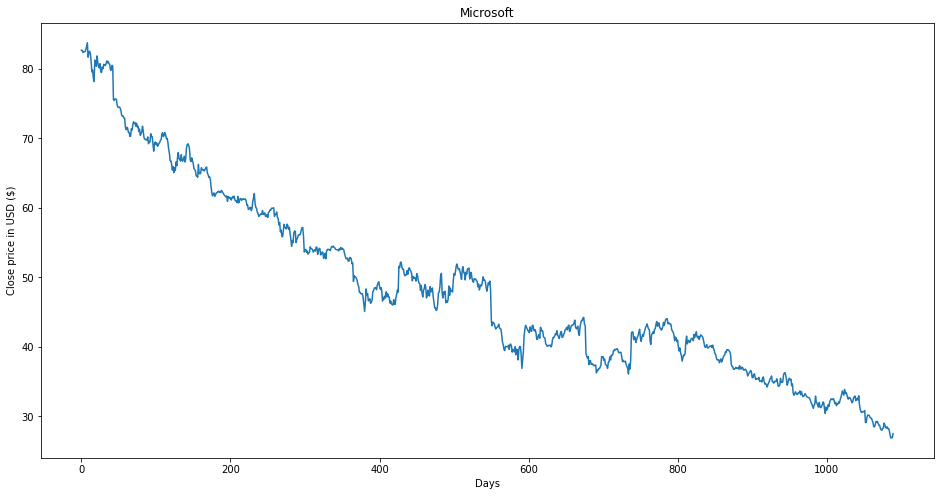

In [23]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Microsoft")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot(df['Adj_Close'])
plt.show()

In [24]:
#get the close price 
df = df[['Adj_Close']]
df.head()

,Adj_Close
0,82.654531
1,82.644889
2,82.345975
3,82.452041
4,82.442398


In [25]:
#creating a variable to predict the 'x' days into the future
future_days = 25
#create a new column (target) shifted x days up
df['Predict'] = df[['Adj_Close']].shift(-future_days)
df.tail(4)

,Adj_Close,Predict
1086,26.900929,NaN
1087,26.972603,NaN
1088,26.938061,NaN
1089,27.529585,NaN


In [26]:
#create the feature data set(X) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Predict'],1))[:-future_days]
print(x)

[[82.65453097]
 [82.64488858]
 [82.34597463]
 ...
 [29.1530358 ]
 [28.55719472]
 [28.50538246]]


In [27]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the 'x' rows/days.
y = np.array(df['Predict'])[:-future_days]
print(y)

[80.72605381 79.5786099  79.45325889 ... 26.97260288 26.93806137
 27.52958475]


In [28]:
#split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [29]:
#create the models
#create the desicion tree regressor
tree = DecisionTreeRegressor().fit(x_train,y_train)
#create the leniar regression model
lr = LinearRegression().fit(x_train,y_train)

In [30]:
# get the last 'x' rows of the feature data set
x_future = df.drop(['Predict'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [31]:
#show the model tree prediction
tree_predict = tree.predict(x_future)
print(tree_predict)
print()
#show the model leniar regression prediction 
lr_predict = lr.predict(x_future)
print(lr_predict)

[32.26400943 29.25666033 29.23938958 29.29120185 28.997599   28.73853766
 28.06929587 28.29813339 28.06929587 28.06929587 28.27222725 28.31626768
 27.87284103 27.87284103 28.27222725 28.22905036 28.22905036 28.22905036
 28.27222725 27.96998903 27.96998903 26.90092924 27.87284103 27.52958475
 27.52958475]

[32.3900042  32.54297551 32.31754411 32.86502037 31.62514765 31.06156914
 30.7274476  30.63083414 30.73952428 30.72342204 30.76367765 30.89249559
 29.27422016 29.30642464 29.96661661 30.2967126  30.27255923 30.24035474
 30.01492334 29.89415652 29.86195203 29.60431614 29.30642464 28.75089726
 28.70259053]


c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


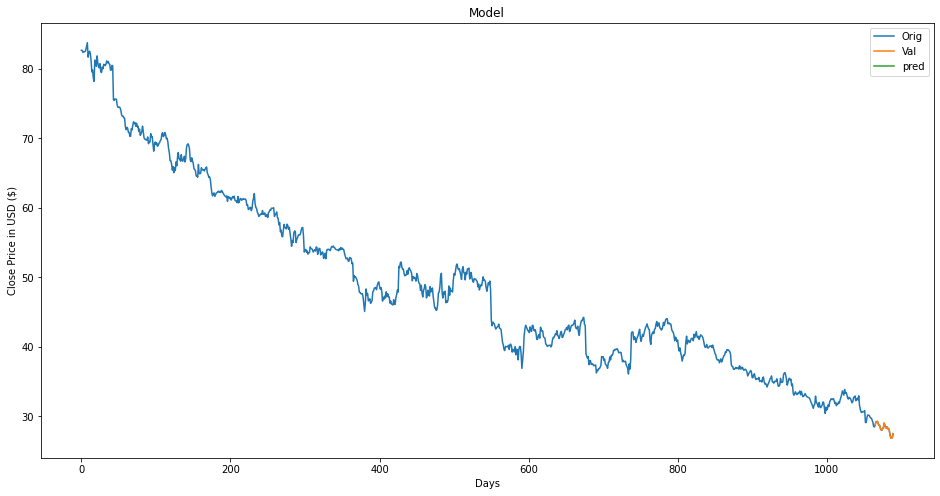

In [33]:
#vizulize the data
predict = tree_predict
valid = df[x.shape[0]:]
valid['Predictions'] = predict
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Adj_Close'])
plt.plot(valid[['Adj_Close','Predict']])
plt.legend(['Orig','Val','pred'])
plt.show()

c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


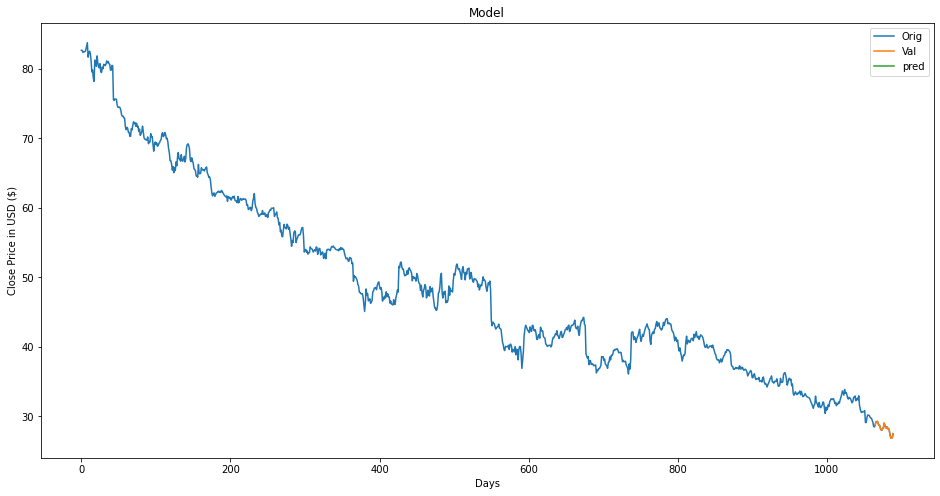

In [34]:
#vizulize the data
predict = lr_predict
valid = df[x.shape[0]:]
valid['Predictions'] = predict
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Adj_Close'])
plt.plot(valid[['Adj_Close','Predict']])
plt.legend(['Orig','Val','pred'])
plt.show()